## CS 372

### Assignment 2 - Decision Trees

- Grace Biggs

- Brandon L'Abbe

- Lane Thompson

- Zhiyi Zhan

### Exploratory Data Analysis (Grace Biggs)

In [5]:
# Binary: Personal Loan, Securities Account, CD Account, Online, Credit Card
# Continuous: Age, Experience, Income, CCAvg, Mortgage
# Ordinal: Family
# Categorical: Education
# Other: ZIP Code
# Target: Personal Loan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Personal Loan Data_DT.xlsx', sheet_name='Data')
df = df.drop(columns=['ID']) # Drop ID column - provides no useful info.
# df = df.drop(columns=['ZIP Code']) # ZIP Code 
# df = df.drop(columns=['Age']) # Extremely high correlation between Age and Experience. Drop Age.

print("Dataframe: ")
print(df.head())
print("Number of Duplicates: ")
print(df.duplicated().sum()) # 13 duplicates.
# What to do with them?
print("Number of missing values: ")
print(df.isnull().sum()) # 2 missing experience, 4 missing education
# We're making a Decision Tree from this dataset of 5000 rows. Because only 6 rows (0.12%) are missing data, we can safely drop them.
df = df.dropna()

Dataframe: 
   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   47        23.0     148     94551       2    7.5  Undergrad         0   
1   48        24.0      71     93117       2    1.7  Undergrad       145   
2   62        37.0      58     91320       4    1.7  Undergrad         0   
3   57        32.0      28     95831       3    0.2  Undergrad         0   
4   51        26.0      70     90089       1    1.2  Undergrad       169   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   0           1       1           1  
1              0                   0           0       0           1  
2              0                   0           0       1           0  
3              0                   0           0       1           1  
4              0                   0           0       0           0  
Number of Duplicates: 
0
Number of missing values: 
Age                   0
Experience            2
Incom

We drop the ID column from the dataframe, as it does not encode any relevant information as far as predicting whether a customer accepted a personal loan. We could also drop the ZIP Code column, as (in theory) this shouldn't affect personal loan acceptances in such a way that a decision tree classifier could derive information from it. We could also drop *either* the Age or Experience column, as they are almost completely correlated. 

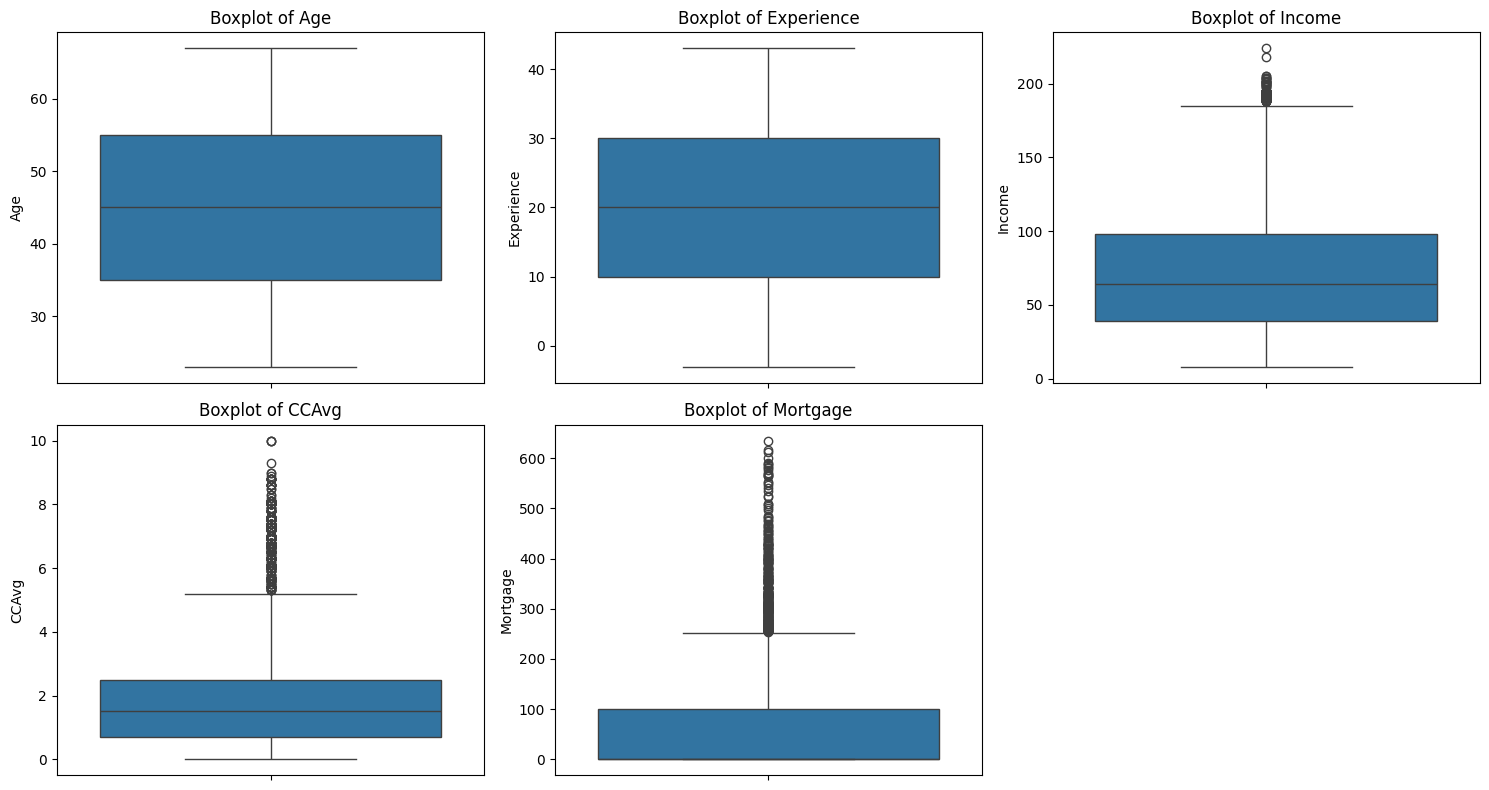

In [6]:
# Check for outliers with Boxplots. 
continuous_vars = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
plt.figure(figsize=(15,8))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# How do we deal with outliers? Do nothing? Pre-pruning? Post-pruning?

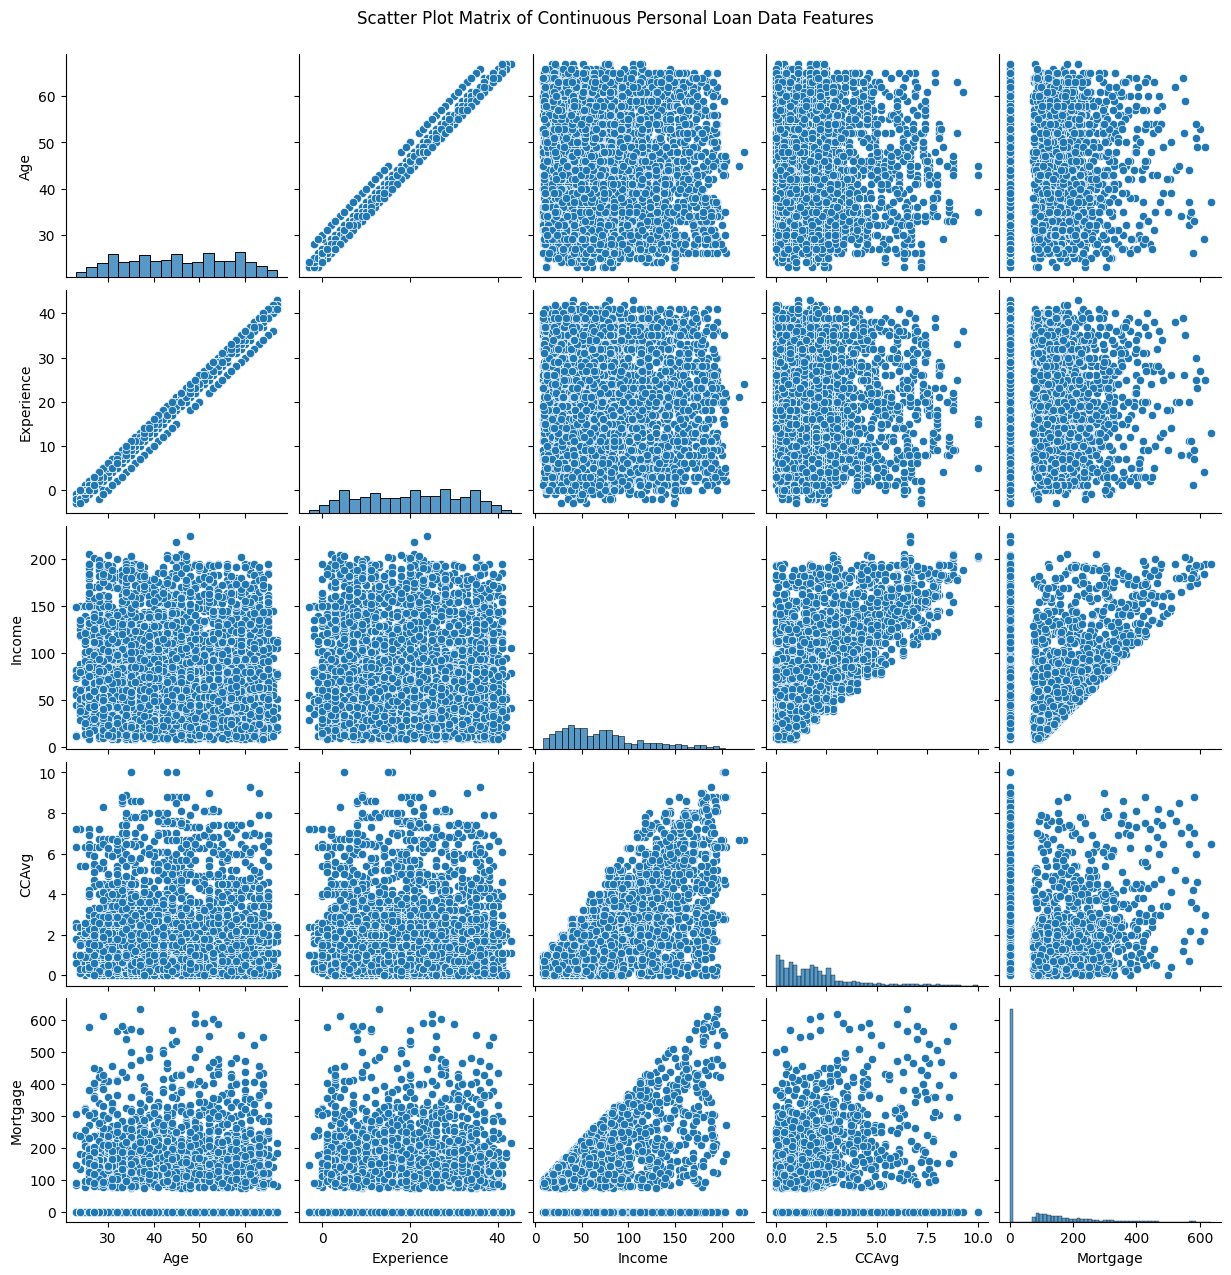

In [7]:
# Draw scatter plot matrix for all features. Comment.
sns.pairplot(df[continuous_vars])
plt.suptitle('Scatter Plot Matrix of Continuous Personal Loan Data Features', y=1.02)
plt.show()

- Age and Experience are linearly correlated.
- Income seems moderately correlated to CCAvg and Mortgage.

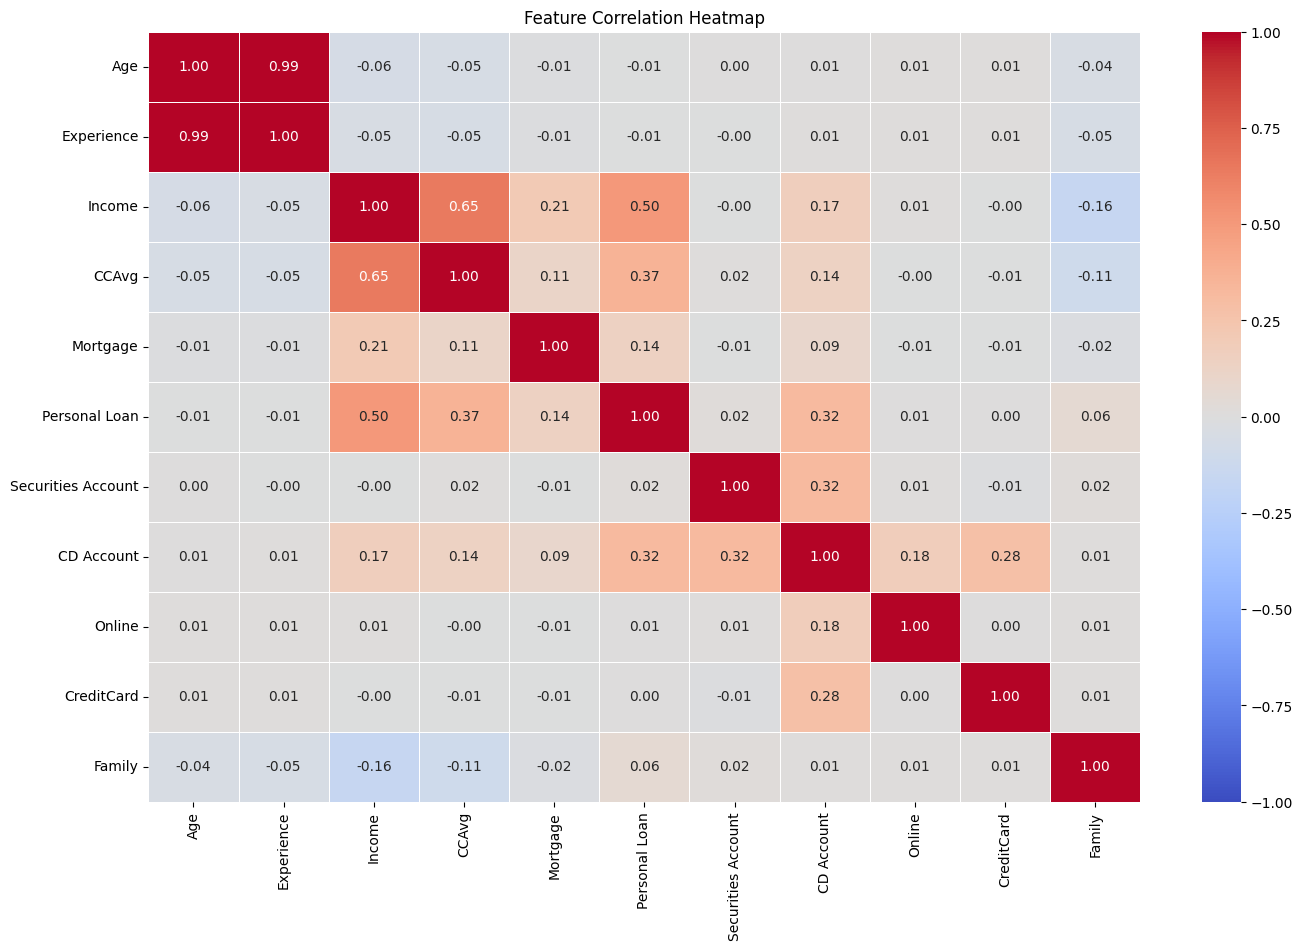

In [8]:
# Draw a heatmap plot between features. Comment.
binary_vars = ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
ordinal_vars = ['Family']
numeric_vars = continuous_vars + binary_vars + ordinal_vars

plt.figure(figsize=(16,10))
sns.heatmap(df[numeric_vars].corr(), annot=True, fmt=".2f", 
            cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

## Decision Trees
#### Grace Biggs, Brandon L'Abbe, Lane Thompson

Time taken to train Gini Tree:  0.005463838577270508
Gini Tree Score:  0.974974974974975
Time taken to train Entropy Tree:  0.003998517990112305
Entropy Tree Score:  0.972972972972973


[Text(0.4887640449438202, 0.9615384615384616, 'Family <= 98.5\nentropy = 0.456\nsamples = 3995\nvalue = [3612, 383]\nclass = Decline'),
 Text(0.23595505617977527, 0.8846153846153846, 'Mortgage <= 2.95\n0.07\n2995\n[2970, 25]\nDecline'),
 Text(0.21348314606741572, 0.8076923076923077, '0.0\n2831\n[2831, 0]\nDecline'),
 Text(0.25842696629213485, 0.8076923076923077, 'CD Account <= 0.5\n0.616\n164\n[139, 25]\nDecline'),
 Text(0.21348314606741572, 0.7307692307692307, 'Mortgage <= 3.95\n0.516\n156\n[138, 18]\nDecline'),
 Text(0.19101123595505617, 0.6538461538461539, 'Family <= 81.5\n0.639\n111\n[93, 18]\nDecline'),
 Text(0.11235955056179775, 0.5769230769230769, 'Income <= 36.5\n0.33\n66\n[62, 4]\nDecline'),
 Text(0.06741573033707865, 0.5, 'Education <= 3.5\n0.918\n9\n[6, 3]\nDecline'),
 Text(0.0449438202247191, 0.4230769230769231, 'Mortgage <= 3.5\n0.811\n4\n[1, 3]\nAccept'),
 Text(0.02247191011235955, 0.34615384615384615, '0.0\n3\n[0, 3]\nAccept'),
 Text(0.06741573033707865, 0.34615384615384

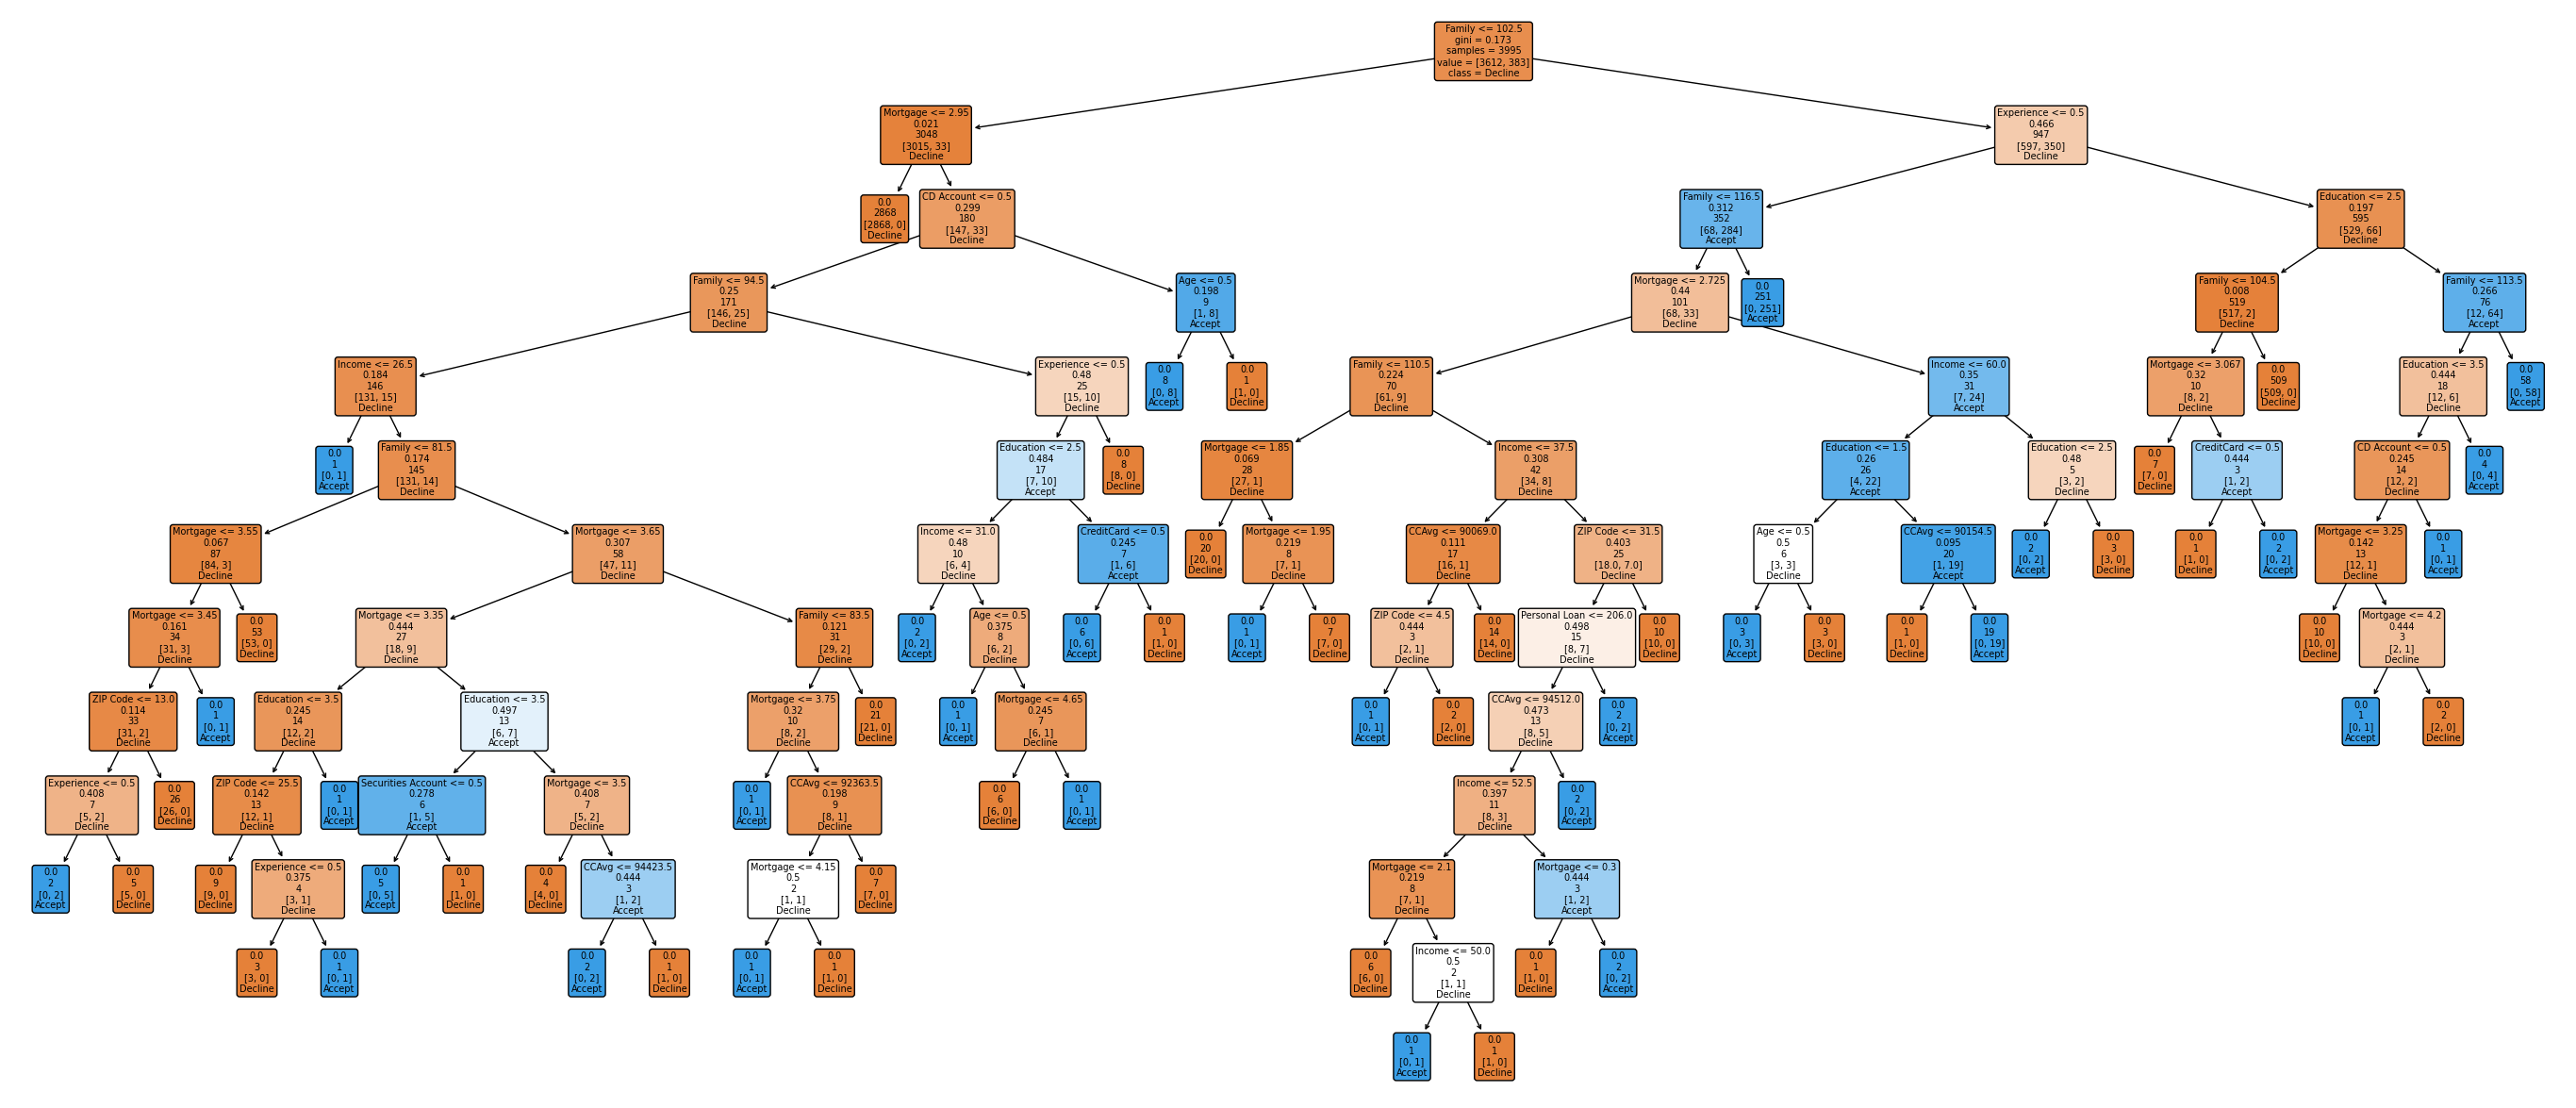

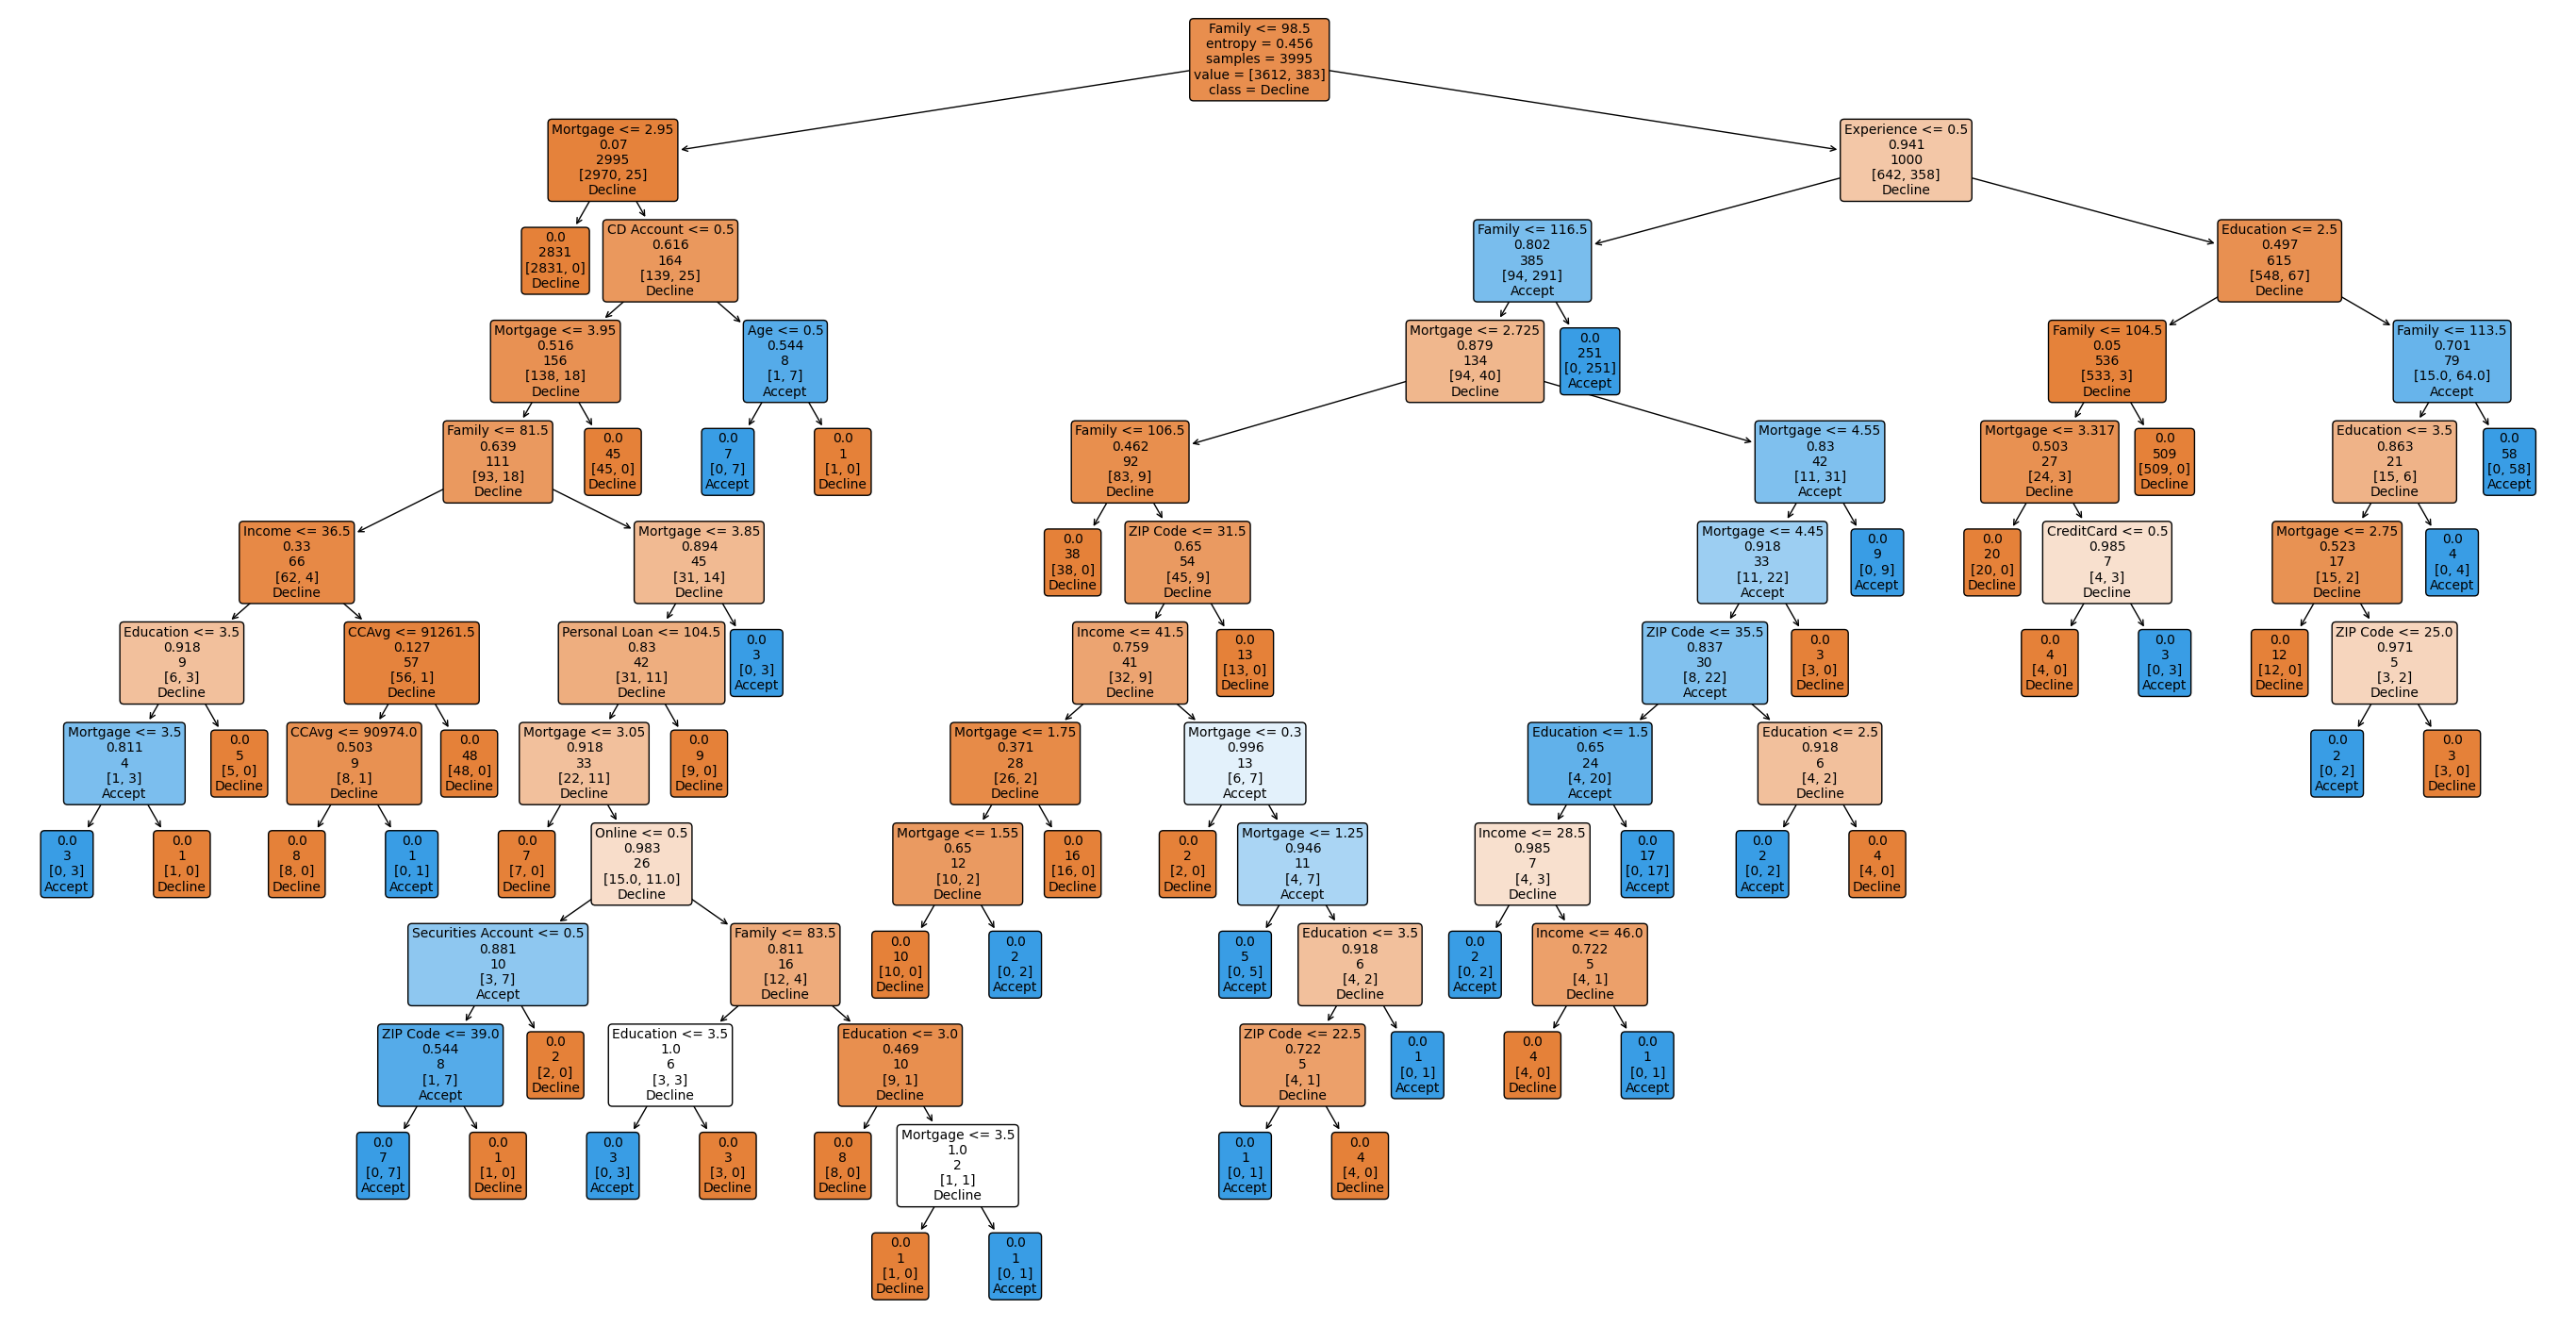

In [9]:
import sklearn.compose
import sklearn.model_selection
import sklearn.tree

import time

X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']
# Convert categorical columns into one-hots with ColumnTransformer()
ct = sklearn.compose.ColumnTransformer(
    transformers=[('cat', sklearn.preprocessing.OneHotEncoder(drop='first'), ['Education'])],
    remainder='passthrough'
)
state_value = 42
# Apply the transformation to the features
X_processed = ct.fit_transform(X)
# split the data into training and validation sets
data_train, data_test, label_train, label_test = sklearn.model_selection.train_test_split(X_processed, y, test_size=0.2, random_state=state_value, stratify=y)

# Build and compare two Decision Trees, based on Gini Impurity and Entropy.
start = time.time()
gini_tree = sklearn.tree.DecisionTreeClassifier(criterion='gini',random_state=state_value)
gini_tree.fit(data_train, label_train)
end = time.time()
gini_train_time = end - start
print("Time taken to train Gini Tree: ", gini_train_time)
print("Gini Tree Score: ", gini_tree.score(data_test, label_test))
start = time.time()
entropy_tree = sklearn.tree.DecisionTreeClassifier(criterion='entropy',random_state=state_value)
entropy_tree.fit(data_train, label_train)
end = time.time()
entropy_train_time = end - start
print("Time taken to train Entropy Tree: ", entropy_train_time)
print("Entropy Tree Score: ", entropy_tree.score(data_test, label_test))


# Visualize the fully-grown Decision Trees you built with a tree graph. 
# Include the feature name in the visualization of the trees, not the index of the feature.
plt.figure(figsize=(35,15))
sklearn.tree.plot_tree(gini_tree, fontsize=7, feature_names=df.columns, class_names=["Decline", "Accept"], label='root', filled=True, rounded=True) # TODO: Does this feature names list include the target feature? (Personal Loan?) Also, are these class names in the right order?

plt.figure(figsize=(35,18))
sklearn.tree.plot_tree(entropy_tree, fontsize=10, feature_names=df.columns, class_names=["Decline", "Accept"], label='root', filled=True, rounded=True)

## Model Evaluation
#### Lane Thompson
- Evaluate the performance of your classifier using:
    - execution time
    - accuaracy
    - confusion matrix (comment on the results)
- Analyze, explain, and comment on the evaluation results
- How does the Number of training sample affect performance (accuracy, time, etc.)? Explain and draw graphs to support your claims.

#### Gini Impurity

Execution time: 0.0012 seconds
Accuracy: 0.9750
Confusion Matrix:


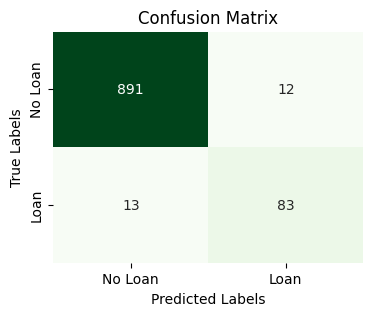

In [10]:
## Evaluate the performance of your classifier using:
# execution time
import time
import sklearn

start = time.time()
label_prediction = gini_tree.predict(data_test)
end = time.time()
gini_test_time = end - start
print(f"Execution time: {gini_test_time:.4f} seconds")
# accuracy
accuracy = sklearn.metrics.accuracy_score(label_test, label_prediction)
print(f"Accuracy: {accuracy:.4f}")
# confusion matrix
confusion_matrix = sklearn.metrics.confusion_matrix(label_test, label_prediction)
print("Confusion Matrix:")
plt.figure(figsize=(4, 3))
sns.heatmap(sklearn.metrics.confusion_matrix(label_test, label_prediction),
            annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

#### Entropy

Execution time: 0.0000 seconds
Accuracy: 0.9730
Confusion Matrix:


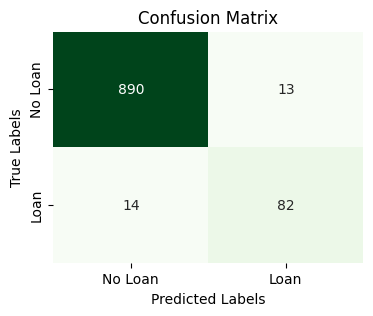

In [11]:
## Evaluate the performance of your classifier using:
# execution time
import time
import sklearn

start = time.time()
label_prediction = entropy_tree.predict(data_test)
end = time.time()
entropy_test_time = end - start
print(f"Execution time: {entropy_test_time:.4f} seconds")
# accuracy
accuracy = sklearn.metrics.accuracy_score(label_test, label_prediction)
print(f"Accuracy: {accuracy:.4f}")
# confusion matrix
confusion_matrix = sklearn.metrics.confusion_matrix(label_test, label_prediction)
print("Confusion Matrix:")
plt.figure(figsize=(4, 3))
sns.heatmap(sklearn.metrics.confusion_matrix(label_test, label_prediction),
            annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

def split_and_test(X, y, test_size=0.5, random_state=None, tree_type='gini'):
    X_train, X_test = train_test_split(X, test_size=test_size, random_state=random_state)
    y_train, y_test = train_test_split(y, test_size=test_size, random_state=random_state)

    start = time.time()
    tree = sklearn.tree.DecisionTreeClassifier(criterion=tree_type, random_state=random_state)
    tree.fit(X_train, y_train)
    score = sklearn.metrics.accuracy_score(tree.predict(X_test), y_test)
    end = time.time()
    test_time = end - start

    return test_time, score

class tests:
    def __init__(self, data, labels, test_sizes, random_state, tree_type):
        self.data = data
        self.labels = labels
        self.test_sizes = test_sizes
        self.random_state = random_state
        self.tree_type = tree_type
        self.results = []

        for test_size in self.test_sizes:
            train_time, score = split_and_test(data, labels, test_size=test_size, random_state=self.random_state, tree_type=self.tree_type)
            self.results.append((train_time, score))

test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
random_state = 42
gini_tests = tests(X_processed, y, test_sizes, random_state, 'gini')
entropy_tests = tests(X_processed, y, test_sizes, random_state, 'entropy')



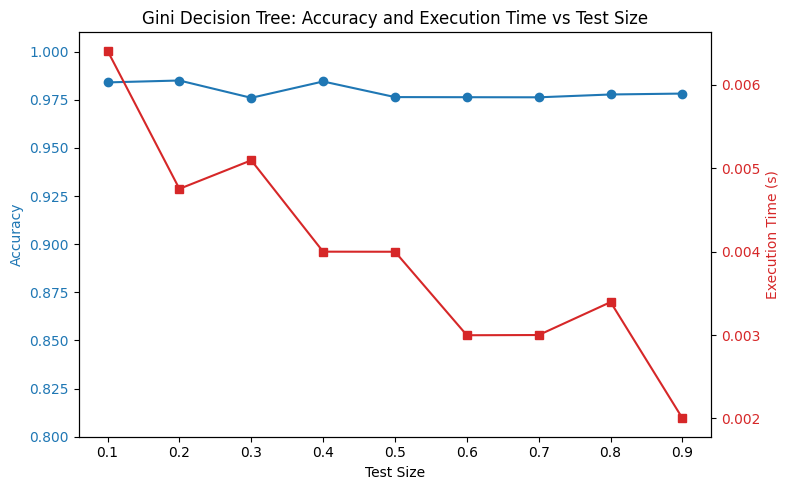

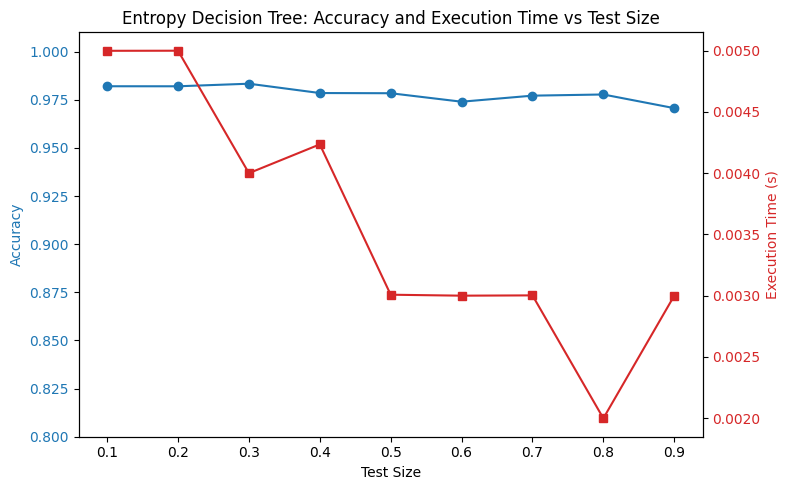

In [13]:
# Plot the accuracy and execution time of the gini decision tree for different test sizes
gini_times = [result[0] for result in gini_tests.results]
gini_scores = [result[1] for result in gini_tests.results]

fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:blue'
ax1.set_xlabel('Test Size')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(test_sizes, gini_scores, marker='o', color=color, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0.8, 1.01)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Execution Time (s)', color=color)
ax2.plot(test_sizes, gini_times, marker='s', color=color, label='Execution Time')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Gini Decision Tree: Accuracy and Execution Time vs Test Size')
fig.tight_layout()
plt.show()

# Plot the accuracy and execution time of the entropy decision tree for different test sizes
entropy_times = [result[0] for result in entropy_tests.results]
entropy_scores = [result[1] for result in entropy_tests.results]

fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:blue'
ax1.set_xlabel('Test Size')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(test_sizes, entropy_scores, marker='o', color=color, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0.8, 1.01)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Execution Time (s)', color=color)
ax2.plot(test_sizes, entropy_times, marker='s', color=color, label='Execution Time')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Entropy Decision Tree: Accuracy and Execution Time vs Test Size')
fig.tight_layout()
plt.show()

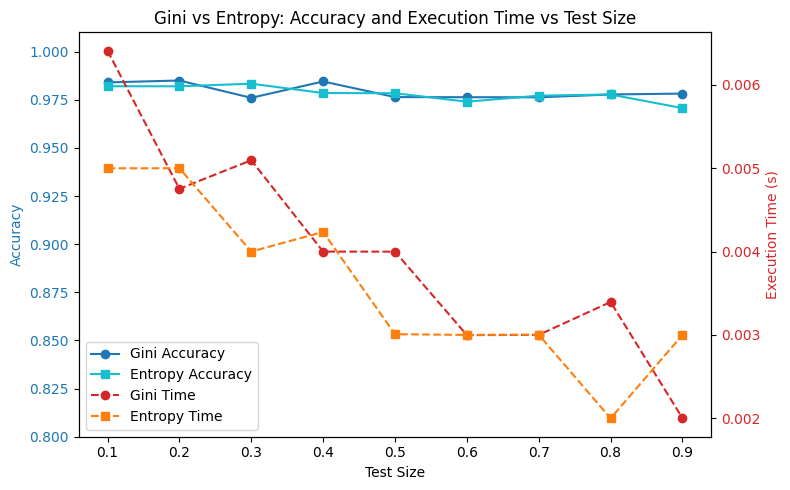

In [14]:
fig, ax1 = plt.subplots(figsize=(8, 5))

# Accuracy plot
ax1.set_xlabel('Test Size')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(test_sizes, gini_scores, marker='o', color='tab:blue', label='Gini Accuracy')
ax1.plot(test_sizes, entropy_scores, marker='s', color='tab:cyan', label='Entropy Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_ylim(0.8, 1.01)

# Execution time plot
ax2 = ax1.twinx()
ax2.set_ylabel('Execution Time (s)', color='tab:red')
ax2.plot(test_sizes, gini_times, marker='o', linestyle='--', color='tab:red', label='Gini Time')
ax2.plot(test_sizes, entropy_times, marker='s', linestyle='--', color='tab:orange', label='Entropy Time')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower left')

plt.title('Gini vs Entropy: Accuracy and Execution Time vs Test Size')
fig.tight_layout()
plt.show()

##### Analyze, explain, and comment on the evaluation results

##### How does the Number of training sample affect performance (accuracy, time, etc.)? Explain and draw graphs to support your claims.

Changing the percentage of the test-train split has an interesting performance effect. While I would have expected Gini to be a more faster, it took longer to train and predict than entropy in almost all cases.

The difference in accuracy between the two models seems non-significent. Looking at the confusion matrices, it shows that both models were accurate with little difference between them. Additionally, there was little difference in the number of false negatives to false positives, and each model leaned in opposite directions for their incorrect classifications.

In [15]:
# Tree Pruning (YOUR NAME HERE)